# **CNN 入門**
此份程式碼會介紹透過一個簡單的公開資料集，建置模型、訓練模型，並比較 DNN model 處理影像型資料的差異。

## 匯入所需套件

In [3]:
# import package
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input, Dense, Dropout, Activation,
                                     BatchNormalization, Flatten,
                                     Conv2D, MaxPooling2D)

## Cifar10 資料讀入及前處理

![](https://i.imgur.com/edFmvOC.png)

In [5]:
# cifar10 中有將 data 先分為 train 和 test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# x_train.shape: 四個維度：第 1 維度為筆數、第 2, 3 維度為影像大小 32*32、第 4 維度是 RGB 三原色，所以是 3
# x_train 中有 50000 筆訓練資料，以及 x_test 中有 10000 筆的測試資料

x_train shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
50000 train samples
10000 test samples


[0 1 2 3 4 5 6 7 8 9] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


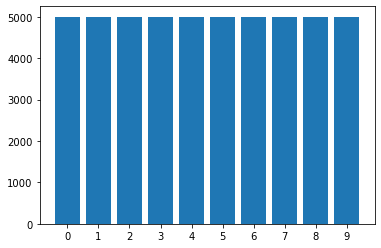

In [6]:
uniques, counts = np.unique(y_train, return_counts=True)
print(uniques, counts)

plt.bar(uniques, counts)
plt.xticks(uniques)
plt.show()

[0 1 2 3 4 5 6 7 8 9] [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


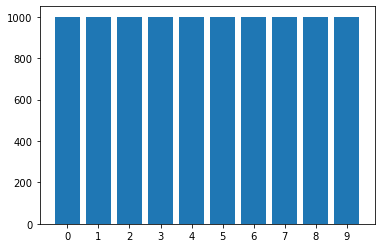

In [7]:
uniques, counts = np.unique(y_test, return_counts=True)
print(uniques, counts)

plt.bar(uniques, counts)
plt.xticks(uniques)
plt.show()

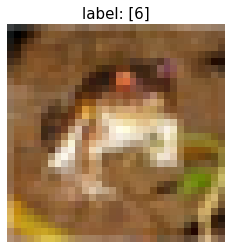

In [8]:
plt.imshow(x_train[0])
plt.title("label: {}".format(y_train[0]), fontsize=15)     # 第 0 筆圖像資料分類的位置
plt.axis("off")
plt.show()

In [9]:
x_train.dtype

dtype('uint8')

In [10]:
# 記得轉成 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 將 features (照片影像特徵值) 標準化，可以提高模型預測的準確度，並且更快收斂
x_train /= 255  # rescaling
x_test /= 255   # rescaling

In [11]:
y_train[0:10]    # 0:10筆的類別

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [13]:
# 將訓練資料與測試資料的 label，進行 Onehot encoding 轉換
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# y_train = np.eye(num_classes, dtype='float32')[y_train[:, 0]]
# y_test = np.eye(num_classes, dtype='float32')[y_test[:, 0]]

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


## 模型定義

In [14]:
dnn_model = Sequential()

dnn_model.add(Flatten(input_shape=x_train.shape[1:]))
dnn_model.add(Dense(32))
dnn_model.add(Activation('relu'))
dnn_model.add(Dense(32))
dnn_model.add(Activation('relu'))
dnn_model.add(Dense(64))
dnn_model.add(Activation('relu'))
dnn_model.add(Dense(64))
dnn_model.add(Activation('relu'))
dnn_model.add(Dense(num_classes))
dnn_model.add(Activation('softmax'))

2023-03-08 14:58:51.884987: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 14:58:52.534065: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10417 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:04:00.0, compute capability: 6.1


In [15]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 32)                98336     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 activation_2 (Activation)   (None, 64)                0

* ### CNN Model
![](https://i.imgur.com/fyoPGuk.png)

In [16]:
# 選擇 Keras 的 API 寫法
inputs = Input(shape=x_train.shape[1:])

# 第一層
# 建立卷積層，設定32個3*3的filters
# 設定ReLU為激活函數。
x = Conv2D(32, (3, 3), activation='relu')(inputs)

# 第二層 - 卷積層 + 池化層
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 第三層 - 卷積層
x = Conv2D(64, (3, 3), activation='relu')(x)

# 第四層 - 卷積層 + 池化層
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 建立分類模型 (MLP) : 平坦層 + 輸出層 (10)
x = Flatten()(x)
outputs = Dense(num_classes, activation='softmax')(x)


cnn_model = Model(inputs=inputs, outputs=outputs)

In [17]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                             

In [18]:
# 編譯模型
# 選用 Adam 為 optimizer
learning_rate = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

dnn_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

## 開始訓練模型

In [19]:
batch_size = 32
epochs = 20

In [20]:
print('Training DNN model')
dnn_history = dnn_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=1)
print('Training CNN model')
cnn_history = cnn_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=1)

Training DNN model
Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9897 - accuracy: 0.2707 - val_loss: 1.8637 - val_accuracy: 0.3311
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8099 - accuracy: 0.3499 - val_loss: 1.7664 - val_accuracy: 0.3659
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7474 - accuracy: 0.3732 - val_loss: 1.7364 - val_accuracy: 0.3774
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7038 - accuracy: 0.3896 - val_loss: 1.6767 - val_accuracy: 0.4000
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6692 - accuracy: 0.4017 - val_loss: 1.6756 - val_accuracy: 0.4040
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6429 - accuracy: 0.4117 - val_loss: 1.6287 - val_accuracy: 0.4183
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6199 - accuracy: 0.4211 - val_loss: 1.6

2023-03-08 15:08:27.344724: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


1563/1563 [==============================] - 6s 3ms/step - loss: 1.6611 - accuracy: 0.3991 - val_loss: 1.4755 - val_accuracy: 0.4695
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4277 - accuracy: 0.4907 - val_loss: 1.4411 - val_accuracy: 0.4915
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3391 - accuracy: 0.5255 - val_loss: 1.3148 - val_accuracy: 0.5357
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2732 - accuracy: 0.5515 - val_loss: 1.2761 - val_accuracy: 0.5451
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2204 - accuracy: 0.5730 - val_loss: 1.1902 - val_accuracy: 0.5806
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1703 - accuracy: 0.5910 - val_loss: 1.1668 - val_accuracy: 0.5853
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1337 - accuracy: 0.6059 - val_loss: 1.1485 - val_accuracy: 0.5964
Epo

## 測試資料

prediction:  [3]


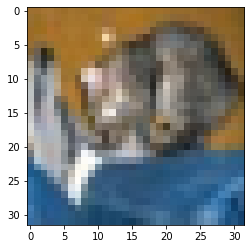

In [21]:
test_pred = cnn_model.predict(x_test[0:1]).argmax(-1)

plt.imshow(x_test[0])
print('prediction: ', test_pred)

In [22]:
print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [23]:
dnn_loss, dnn_acc = dnn_model.evaluate(x_test, y_test, verbose=2)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 1.5110 - accuracy: 0.4619 - 420ms/epoch - 1ms/step
313/313 - 1s - loss: 0.8994 - accuracy: 0.6952 - 562ms/epoch - 2ms/step


## 訓練結果視覺化

In [30]:
history_list = [cnn_history, dnn_history]
history_train_acc = ["cnn_train_acc", "dnn_train_acc"]
history_valid_acc = ["cnn_valid_acc", "dnn_valid_acc"]
history_train_loss = ["cnn_train_loss", "dnn_train_loss"]
history_valid_loss = ["cnn_valid_loss", "dnn_valid_loss"]

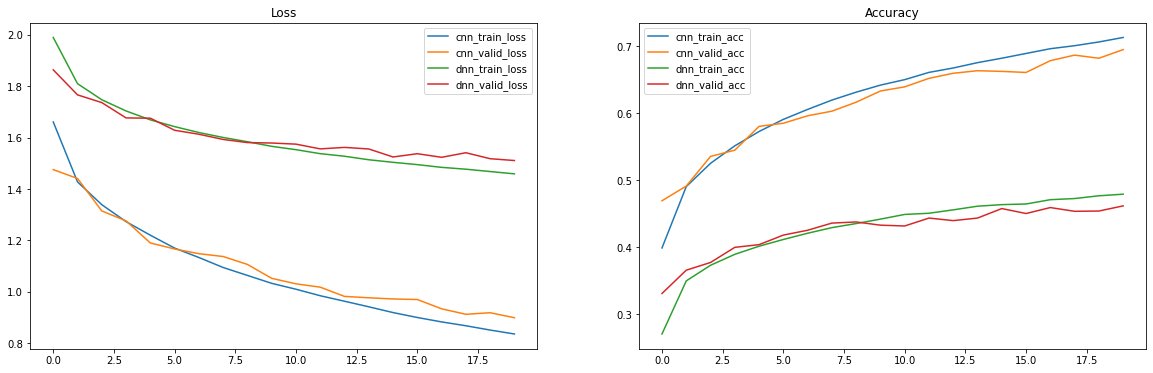

In [32]:
plt.figure(figsize=(20, 6))

# training loss
plt.subplot(1, 2, 1)
for each_his, each_train, each_valid in zip(history_list,
                                            history_train_loss,
                                            history_valid_loss):
    l_x = len(each_his.history['loss'])
    plt.plot(np.arange(l_x), each_his.history['loss'], label=each_train)
    plt.plot(np.arange(l_x), each_his.history['val_loss'], label=each_valid)
plt.legend(loc='best')
plt.title('Loss')

# training acc
plt.subplot(1, 2, 2)
for each_his, each_train, each_valid in zip(history_list,
                                            history_train_acc,
                                            history_valid_acc):
    l_x = len(each_his.history['accuracy'])
    plt.plot(np.arange(l_x), each_his.history['accuracy'], label=each_train)
    plt.plot(np.arange(l_x), each_his.history['val_accuracy'], label=each_valid)
plt.legend(loc='best')
plt.title('Accuracy')
plt.show()